# Loan approval prediction

### Purpose: 
The purpose of this notebook is to work with machine learning techniques to make the best model for approving or denying loan applications.

### About The Data:

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N)

### Import required packages

In [681]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Read Train and Test Data

In [682]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


Copy of original data

In [683]:
train_original = train.copy()
test_original = test.copy()

### Data Preprocessing

Preparing the data

In [684]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [685]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [686]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)


Training data shape:  (614, 13)
Test data shape:  (367, 12)


In [687]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [688]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [689]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [690]:
#Drop the "Loan_ID" variable 
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [691]:
#Finding missing values in train Dataset:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [692]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)


In [693]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [694]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

As it is a numerical variable, we will use the median to impute the missing values

In [695]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

check whether all the missing values are filled in the dataset.

In [696]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [697]:
#Finding missing values in test Dataset:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [698]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)


In [699]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Data Visualization

Loan Status Variable

In [700]:
train["Loan_Status"].count()

614

In [701]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Among 614 Loan_Status : Accepted : 422 Rejected : 192

In [702]:
train["Loan_Status"].value_counts(normalize=True)*100


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

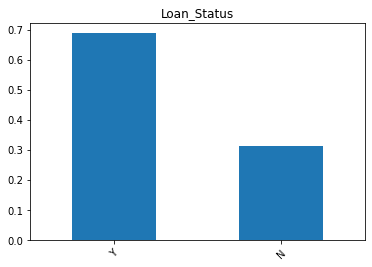

In [703]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', rot=45)

69% ACCEPTED and 31% REJECTED

#### Visualization of categorical features

In [704]:
#Gender variable :
train["Gender"].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

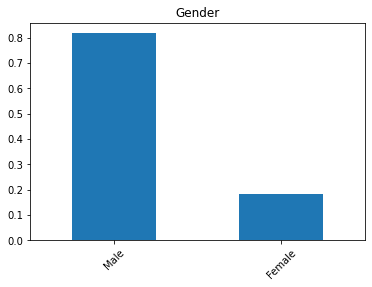

In [705]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',rot=45)

In [706]:
train['Gender'].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

Among 601 person: Male : 489 (81%) Female : 112(19%)

The majority of the applicants are Male

In [707]:
#Maried Variable
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

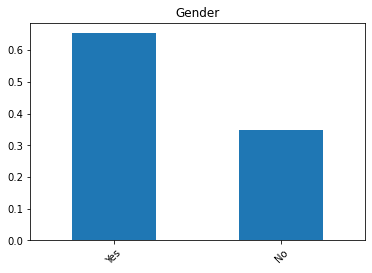

In [708]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Gender',rot=45)

In [709]:
train['Married'].value_counts(normalize=True)*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

Among 611 person: Married : 401 (65%) Unmarried : 213(35%)

The majority of the applicants are married

In [710]:
#Self_Employed Variable
train["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

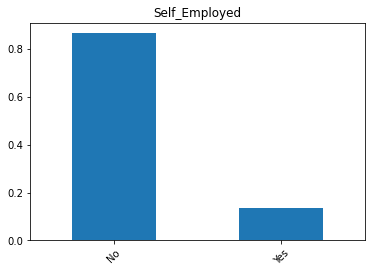

In [711]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',rot=45)

Among 582 people 14% are Self_Employed and  86% are Not_Self_Employed

Most of the applicants are not self employed.

In [712]:
#Credit_History variable 
train["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:title={'center':'Credit_History'}>

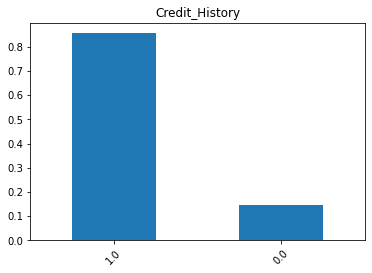

In [713]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',rot=45)

Around 84% applicants have repaid their debts

In [714]:
#Dependents variable
train["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

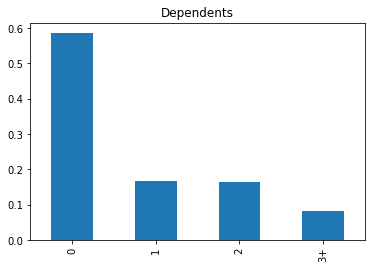

In [715]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

In [716]:
train['Dependents'].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

In [717]:
#Education variable
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

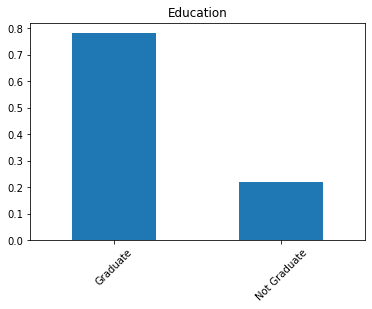

In [718]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education",rot=45)

78% people are Graduated 

22% people are not Graduated

In [719]:
#Property_Area variable
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_Area'}>

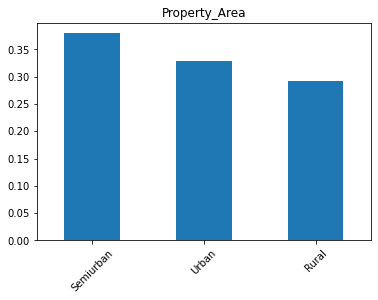

In [720]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area",rot=45)

In [721]:
train["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

#### Visualization of Numerical features

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

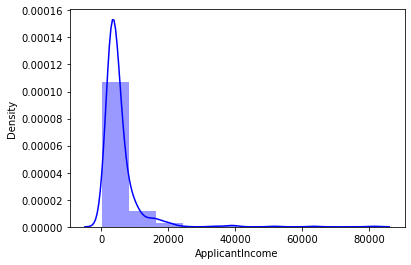

In [722]:
#ApplicantIncome variable
sns.distplot(train["ApplicantIncome"], bins=10, hist=True, kde=True, color="blue")

MAjority of the applicants is between 0-10,000 , only few are from 20,000 onwards. graph is left skewed(most of the applicants are on the left side) which is not a good distribution for training the model.so we will apply the log function in the column to normalize the attribute 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

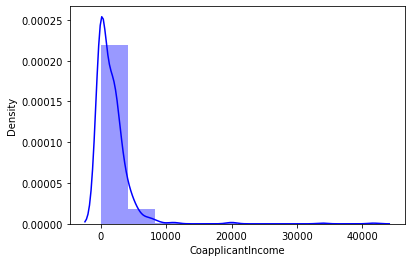

In [723]:
#CoapplicantIncome Variable
sns.distplot(train["CoapplicantIncome"], bins=10, hist=True, kde=True, color="blue")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

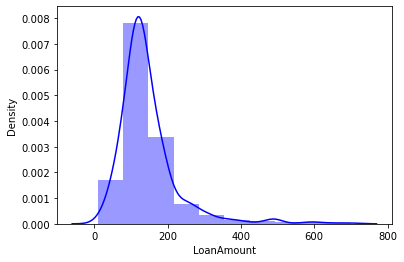

In [724]:
#LoanAmount Variable
sns.distplot(train["LoanAmount"], bins=10, hist=True, kde=True, color="blue")

The distribution of LoanAmount is also left skewed. 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

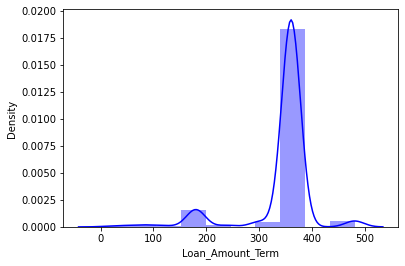

In [725]:
#LoanAmountTerm Varaible
sns.distplot(train["Loan_Amount_Term"], bins=10, hist=True, kde=True, color="blue")



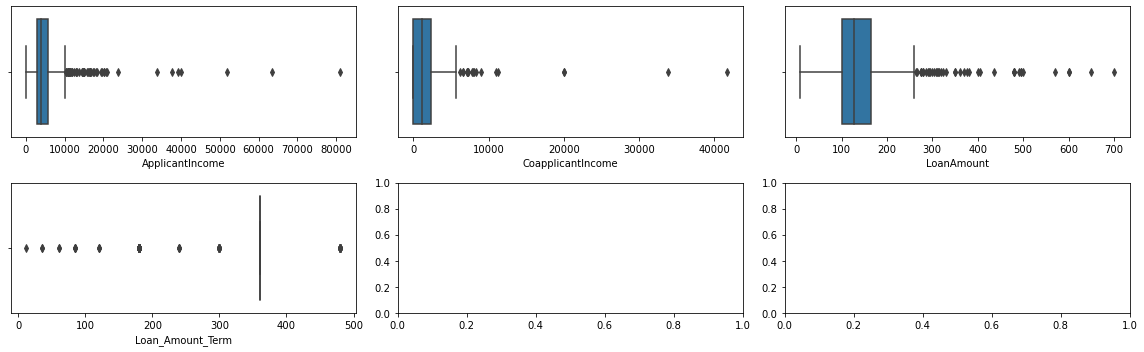

In [726]:
#Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = ((16,5)))
plt1 = sns.boxplot(train['ApplicantIncome'],ax = axs[0,0])
plt2 = sns.boxplot(train['CoapplicantIncome'], ax = axs[0,1])
plt3 = sns.boxplot(train['LoanAmount'], ax = axs[0,2])
plt4 = sns.boxplot(train['Loan_Amount_Term'], ax = axs[1,0])
plt.tight_layout()

We see a lot of outliers in these variables


#### Apply log transformation

<AxesSubplot:>

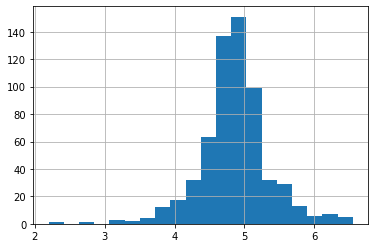

In [727]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

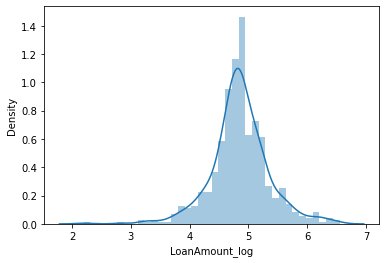

In [728]:
sns.distplot(train["LoanAmount_log"])

<AxesSubplot:>

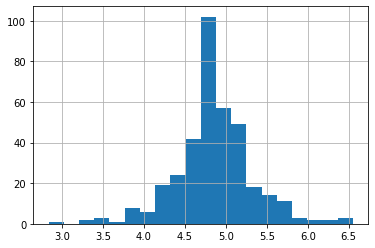

In [729]:
#TEST SET
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

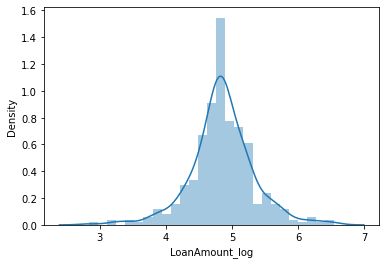

In [730]:
sns.distplot(test["LoanAmount_log"])

#### Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


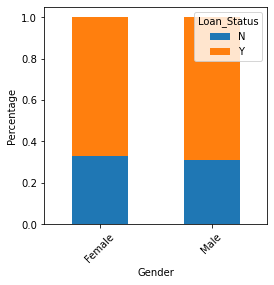

In [731]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),rot=45)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

#### Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


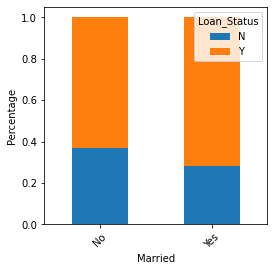

In [732]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),rot=45)
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approved : 285

Number of married people whose Loan was not approved : 113

Number of unmarried people whose Loan was approved : 134

Number of unmarried people whose Loan was not approved : 79

Proportion of Married applicants is higher for the approved loans.

#### Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


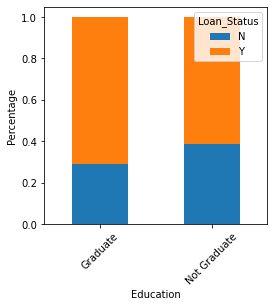

In [733]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),rot=45)
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Proportion of Graduate applicants is higher for the approved loans.

#### Relation between "Loan_Status" and "Credit_History"

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


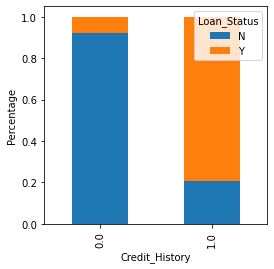

In [734]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 are more likely to get their loans approved.

#### Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


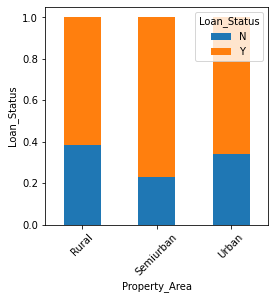

In [735]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),rot=45)
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

#### Relation between "Loan_Status" and "Loan Amount"

In [736]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         114  266
High             31   49


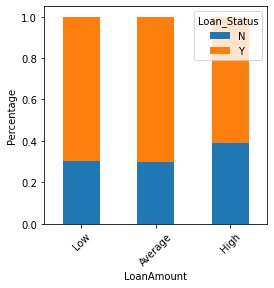

In [737]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=45)
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

The proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.

### Heat map to visualize the correlation ( numerical variables)

<AxesSubplot:>

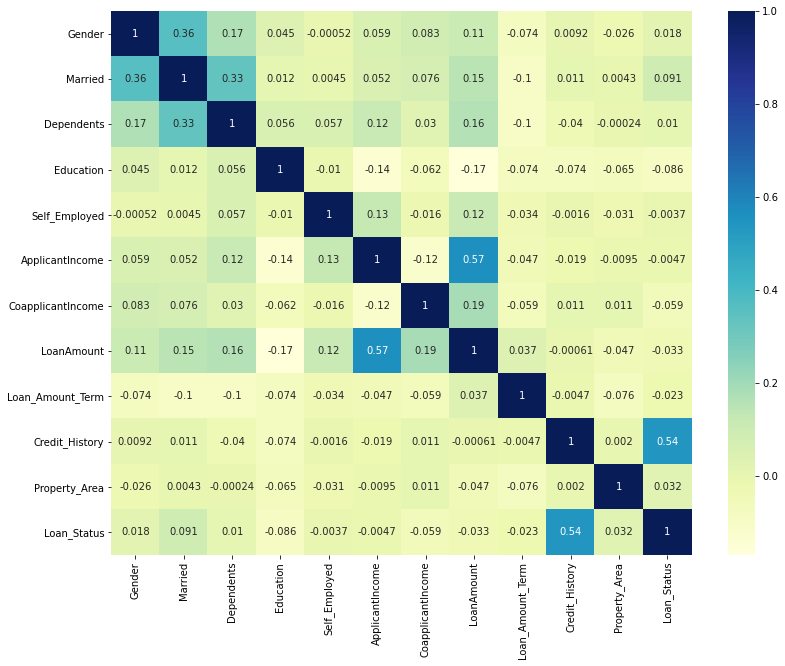

In [738]:
corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

### Create a new feature 'TotalIncome' from the features 'ApplicantIncome' and 'CoapplicantIncome'

In [739]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [740]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


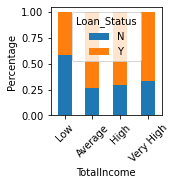

In [741]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2),rot=45)
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Applicants with low Total_Income have less chances to get loan approval  compared to that of applicants with Average, High and Very High Income.

In [742]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [743]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [744]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

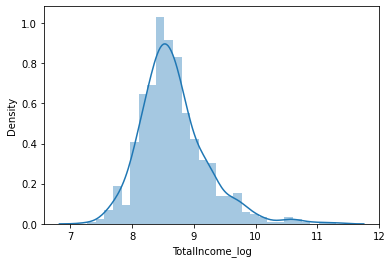

In [745]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

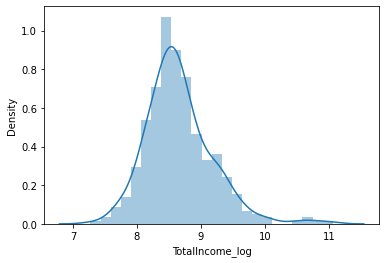

In [746]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])


### Create the EMI feature.

 EMI is the monthly amount to be paid by the applicant to repay the loan.

In [747]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [748]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [749]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


<AxesSubplot:xlabel='EMI', ylabel='Density'>

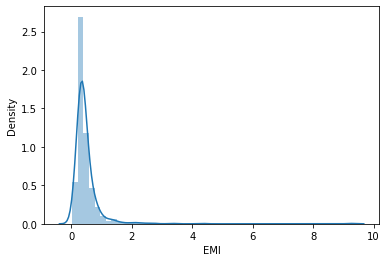

In [750]:
#Distribution of EMI variable.
sns.distplot(train["EMI"])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

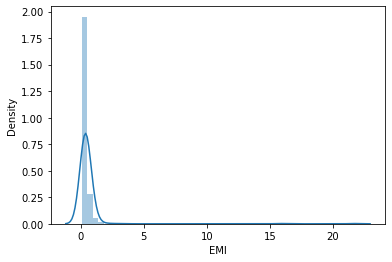

In [751]:
sns.distplot(test["EMI"])

### Create Balance Income feature

The Balance Income is the income left after the EMI has been paid

In [752]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [753]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [754]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [755]:
#Drop the variables which we used to create these new features
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)


In [756]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanAmount_bin,TotalIncome,TotalIncome_bin,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,Average,5849.0,High,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,Average,6091.0,Very High,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,Low,3000.0,Average,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,Average,4941.0,High,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,Average,6000.0,High,8.699515,0.391667,5608.333333


In [757]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)


In [758]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


In [759]:
train=train.drop(["LoanAmount_bin","TotalIncome_bin"],axis=1)

In [760]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,0.391667,5608.333333


### Label Encoding (Converting Categorical variables into numerical)

In [761]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])

In [762]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,1,0,0,0,0,1.0,2,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,1,1,1,0,0,1.0,0,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,1,1,0,0,1,1.0,2,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,1,1,0,1,0,1.0,2,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,1,0,0,0,0,1.0,2,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [763]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Education","Self_Employed","Property_Area", "Dependents"]
le = LabelEncoder()
for col in cols:
    test[col] = le.fit_transform(test[col])

In [764]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,1,1,0,0,0,1.0,2,4.852030,5720,8.674026,0.305556,5719.694444
1,1,1,1,0,0,1.0,2,4.852030,4576,8.714568,0.350000,4575.650000
2,1,1,2,0,0,1.0,2,4.189655,6800,8.006368,0.577778,6799.422222
3,1,1,2,0,0,1.0,2,4.787492,4886,8.505323,0.277778,4885.722222
4,1,0,0,1,0,1.0,2,4.948760,3276,8.699515,0.216667,3275.783333


### Modeling the Data

##### Features extraction

In [765]:
#droping the target variable "Loan_Status"
X=train.drop("Loan_Status",1)

In [767]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,1,0,0,0,0,1.0,2,4.852030,5849.0,8.674026,0.355556,5493.444444
1,1,1,1,0,0,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,1,1,0,0,1,1.0,2,4.189655,3000.0,8.006368,0.183333,2816.666667
3,1,1,0,1,0,1.0,2,4.787492,4941.0,8.505323,0.333333,4607.666667
4,1,0,0,0,0,1.0,2,4.948760,6000.0,8.699515,0.391667,5608.333333


In [768]:
#save the target variable "Loan_Status" in another dataset
y=train[["Loan_Status"]]

In [769]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


#### train_test_split

In [770]:
from sklearn.model_selection import train_test_split

In [771]:
#Splitting Data with test size of 25%
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

## Logistic Regression Model

In [787]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [788]:
#build our logistic model
logistic_model = LogisticRegression(random_state=1)


In [789]:
#fitting training data
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [790]:
#testing model’s performance
pred_cv_logistic=logistic_model.predict(x_cv)

In [795]:
#calculating the accuracy
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic



78.91891891891892

In [809]:
pred_test_logistic = logistic_model.predict(test)


In [845]:
len([int(elt>0.5) for elt in pred_test_logistic if int(elt>0.5) ])

307

#### Confusion matrix
Table that describes the performance of a classification model

In [826]:
print(metrics.confusion_matrix(y_cv, pred_cv_logistic))

[[ 24  37]
 [  2 122]]


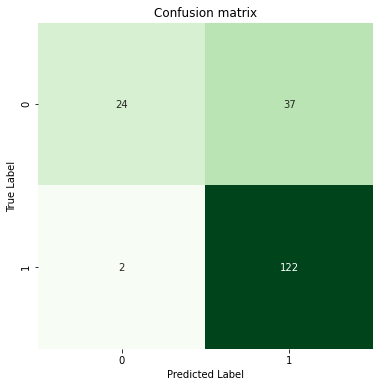

In [825]:
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(y_cv, pred_cv_logistic)
plt.figure(figsize=(6,6))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

True Positives (TP): 122

True Negatives (TN): 24

False Positives (FP): 37

False Negatives (FN): 2



#### ROC AUC
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. 


In [827]:
print(metrics.roc_auc_score(y_cv, pred_cv_logistic))

0.6886567953463776


### Decision-Tree  Classifier

In [810]:
from sklearn.tree import DecisionTreeClassifier

In [811]:
tree_model = DecisionTreeClassifier(random_state=1)

In [812]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [816]:
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
score_tree


69.1891891891892

In [817]:
pred_test_tree = tree_model.predict(test)

In [846]:
len([int(elt>0.5) for elt in pred_test_tree if int(elt>0.5) ])

187

[Text(63.65182883522728, 210.192, 'X[5] <= 0.5\ngini = 0.424\nsamples = 429\nvalue = [131, 298]'),
 Text(15.218181818181819, 195.696, 'X[7] <= 6.301\ngini = 0.146\nsamples = 63\nvalue = [58, 5]'),
 Text(11.413636363636364, 181.2, 'X[7] <= 4.86\ngini = 0.121\nsamples = 62\nvalue = [58, 4]'),
 Text(7.609090909090909, 166.704, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(15.218181818181819, 166.704, 'X[7] <= 4.952\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(7.609090909090909, 152.208, 'X[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(3.8045454545454547, 137.712, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(11.413636363636364, 137.712, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(22.827272727272728, 152.208, 'X[10] <= 0.453\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(19.022727272727273, 137.712, 'X[7] <= 5.069\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(15.218181818181819, 123.216, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text

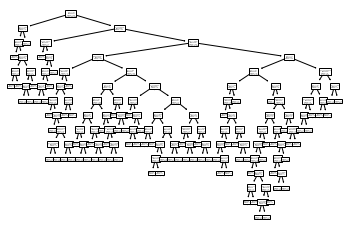

In [831]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

tree.plot_tree(clf) 

### Random Forest Classifier

In [820]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [821]:
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

78.37837837837837

In [822]:
pred_test_forest=forest_model.predict(test)

In [847]:
len([int(elt>0.5) for elt in pred_test_forest if int(elt>0.5) ])

297

This model did better than the decision tree, but still not as good as the logistic regression

### KNN Classifier

In [823]:
from sklearn.neighbors import KNeighborsClassifier


In [824]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_cv)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_cv))

Acuuracy= 0.6594594594594595


Logistic Regression model gives : 79% prediction accuracy

Decision Tree model gives : 69% prediction accuracy

Random Forest model gives : 78% prediction accuracy

K-NN model gives : 66% prediction accuracy

The logistic regression model appeared to do the best for this dataset.

#### Find the important feature

<AxesSubplot:>

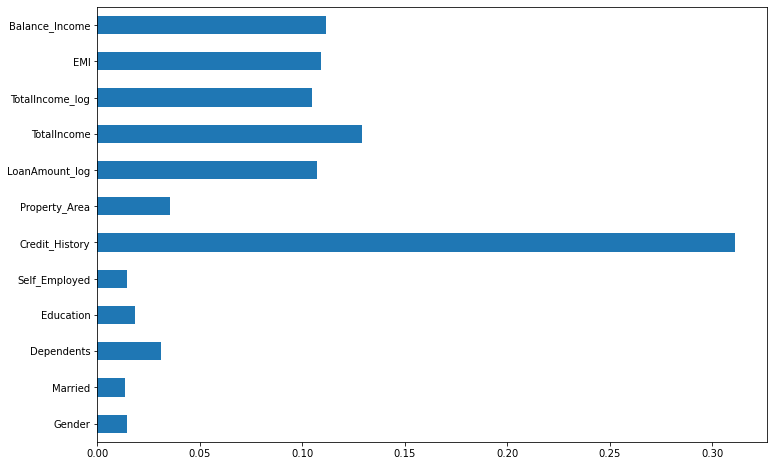

In [832]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

'Credit_History' and 'totalIncome' are the most important features